<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Transformar_conjunto_de_datos_de_desercion_estudiantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre**: Rubén Pizarro Gurrola
**Febrero 2025**


# Objetivo

Transformar un conjunto de datos



# Desarrollo



## Cargar librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Tal vez se use
from scipy import stats # esatadísticos

import math

## Cargar funciones



In [41]:
def f_cargar_datos(ruta_archivo, tipo='csv', hoja_excel=None, separador=','):
    """
    Carga datos desde un archivo especificado.

    Parámetros:
    - ruta_archivo (str): Ruta del archivo a cargar.
    - tipo (str): Tipo de archivo a cargar ('csv', 'excel', 'txt'). Por defecto es 'csv'.
    - hoja_excel (str): Nombre o índice de la hoja, en caso de ser un archivo Excel. Por defecto es None.
    - separador (str): Separador para archivos de texto o CSV. Por defecto es ','.

    Retorna:
    - DataFrame: Un DataFrame con los datos cargados.
    """
    try:
        if tipo == 'csv':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        elif tipo == 'excel':
            datos = pd.read_excel(ruta_archivo, sheet_name=hoja_excel)
        elif tipo == 'txt':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        else:
            raise ValueError("El tipo de archivo no es soportado. Use 'csv', 'excel' o 'txt'.")

        print("Datos cargados correctamente.")
        return datos

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo}' no se encontró.")
    except Exception as e:
        print(f"Ocurrió un error al cargar los datos: {e}")


def f_eliminar_columnas(datos, columnas):
    """
    Elimina las columnas especificadas de un DataFrame.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columnas (list): Lista de nombres de columnas a eliminar.

    Retorna:
    - DataFrame: El DataFrame sin las columnas especificadas.
    """
    try:
        # Verificar si todas las columnas existen
        columnas_existentes = [col for col in columnas if col in datos.columns]
        if not columnas_existentes:
            print("Ninguna de las columnas especificadas existe en el DataFrame.")
            return datos

        # Eliminar las columnas especificadas
        datos_actualizado = datos.drop(columns=columnas_existentes)
        print(f"Columnas eliminadas correctamente: {columnas_existentes}")
        return datos_actualizado

    except Exception as e:
        print(f"Error al eliminar las columnas: {e}")
        return datos


def f_tabla_frecuencia(datos, columna):
    """
    Genera una tabla de frecuencias para datos cualitativos.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columna (str): El nombre de la columna cualitativa a analizar.

    Retorna:
    - DataFrame: Tabla de frecuencias con columnas de frecuencia absoluta, relativa y acumulada.
    """
    try:
        # Contar frecuencias absolutas
        frecuencia = datos[columna].value_counts().reset_index()
        frecuencia.columns = [columna, 'Frecuencia_Absoluta']

        # Calcular frecuencia relativa y porcentual
        total = frecuencia['Frecuencia_Absoluta'].sum()
        frecuencia['Frecuencia_Relativa'] = frecuencia['Frecuencia_Absoluta'] / total
        frecuencia['Frecuencia_Porcentual'] = frecuencia['Frecuencia_Relativa'] * 100

        # Calcular frecuencias acumuladas
        frecuencia['Frecuencia_Acumulada'] = frecuencia['Frecuencia_Absoluta'].cumsum()
        frecuencia['Frecuencia_Porcentual_Acumulada'] = frecuencia['Frecuencia_Porcentual'].cumsum()

        return frecuencia

    except KeyError:
        print(f"Error: La columna '{columna}' no existe en el DataFrame.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

def f_histograma(datos, variable, barras=10):
    # Convertir la variable a un array para cálculos estadísticos
    valores = np.array(datos[variable])

    # Calcular medidas estadísticas
    media = np.mean(valores)
    mediana = np.median(valores)
    # moda = stats.mode(valores)[0][0]

    # Crear el histograma
    plt.figure(figsize=(8, 6))
    plt.hist(valores, bins=barras, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
    # plt.axvline(moda, color='blue', linestyle='--', label=f'Moda: {moda:.2f}')

    # Etiquetas y título
    plt.title('Histograma con Media, Mediana')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

def f_barra(datos, variable, color='lightblue', mostrar='primeros'):
    # Contar la frecuencia de cada categoría
    frecuencias = datos[variable].value_counts()

    # Verificar cuántas categorías hay
    if len(frecuencias) > 10:
        if mostrar == 'primeros':
            frecuencias = frecuencias.head(10)  # Primeras 10 categorías
        elif mostrar == 'ultimos':
            frecuencias = frecuencias.tail(10)  # Últimas 10 categorías

    # Crear el diagrama de barras
    plt.figure(figsize=(8, 6))
    barras = plt.bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)

    # Agregar etiquetas y título
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.title(f'Diagrama de Barras de {variable} (Mostrando {mostrar} 10)')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización si son largas

    # Mostrar valores encima de cada barra
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(),
                 f'{int(barra.get_height())}', ha='center', va='bottom', fontsize=10)

    # Mostrar el gráfico
    plt.show()

# función para ver diagrmas de barras multiples variables
def f_barra_multiple_matriz(datos, variables=None, color='lightblue', mostrar='primeros'):
    # Obtener columnas categóricas si no se especificaron
    if variables is None:
        variables = datos.select_dtypes(include=['object', 'category']).columns.tolist()

    # Verificar si hay variables categóricas
    if not variables:
        print("No hay variables categóricas para graficar.")
        return

    # Determinar la disposición de la matriz según el número de columnas categóricas
    num_columnas = len(variables)
    if num_columnas <= 4:
        filas, columnas = 2, 2
    elif num_columnas <= 9:
        filas, columnas = 3, 3
    elif num_columnas <= 16:
        filas, columnas = 4, 4
    else:
        columnas = 4
        filas = math.ceil(num_columnas / columnas)

    # Crear la figura y subplots
    fig, axes = plt.subplots(filas, columnas, figsize=(columnas * 5, filas * 4))
    axes = axes.flatten()  # Convertir los ejes en una lista para indexar fácilmente

    # Validar el argumento 'mostrar'
    if mostrar not in ['primeros', 'ultimos']:
        mostrar = 'primeros'

    # Generar gráficos
    for i, variable in enumerate(variables):
        if i >= len(axes):  # Prevenir error de índice en subplots
            break

        # Contar la frecuencia de cada categoría
        frecuencias = datos[variable].value_counts()
        total = frecuencias.sum()
        porcentajes = (frecuencias / total) * 100  # Convertir a porcentaje

        # Mostrar solo las primeras o últimas 10 categorías si hay más de 10
        if len(frecuencias) > 10:
            if mostrar == 'primeros':
                frecuencias = frecuencias.head(10)
                porcentajes = porcentajes.head(10)
            elif mostrar == 'ultimos':
                frecuencias = frecuencias.tail(10)
                porcentajes = porcentajes.tail(10)

        # Dibujar el diagrama de barras en el subplot correspondiente
        axes[i].bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{variable}')
        axes[i].set_xlabel('Categorías')
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)

        # Mostrar valores como porcentajes sobre las barras
        for j, (valor, porcentaje) in enumerate(zip(frecuencias.values, porcentajes)):
            axes[i].text(j, valor, f'{porcentaje:.1f}%', ha='center', va='bottom', fontsize=8)

    # Ocultar subplots vacíos
    for ax in axes[num_columnas:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()




# Función que visualiza múltiples histogramas de variables numéricas
def f_histograma_multiple_matriz(datos, columnas=None, bins=10, color='skyblue'):
    """
    Genera múltiples histogramas organizados en una matriz dependiendo del número de variables numéricas seleccionadas.

    Parámetros:
    datos (pd.DataFrame): DataFrame que contiene los datos.
    columnas (list or None): Lista de columnas a graficar. Si es None, selecciona todas las columnas numéricas.
    bins (int): Número de intervalos para los histogramas.
    color (str): Color de los histogramas.

    Retorno:
    Visualiza múltiples histogramas organizados automáticamente.
    """
    # Si no se especifican columnas, selecciona todas las numéricas
    if columnas is None:
        columnas = datos.select_dtypes(include=['number']).columns.tolist()

    # Determinar el número de filas y columnas (3 o 4 columnas dependiendo del número de variables)
    n_vars = len(columnas)
    n_cols = 4 if n_vars > 6 else 3  # Si hay más de 6 variables, usa 4 columnas
    n_rows = math.ceil(n_vars / n_cols)  # Calcular el número de filas necesarias

    # Configuración de subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()  # Aplanar para fácil iteración

    # Graficar cada variable
    for i, variable in enumerate(columnas):
        axes[i].hist(datos[variable].dropna(), bins=bins, color=color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Histograma de {variable}')
        axes[i].set_xlabel(variable)
        axes[i].set_ylabel('Frecuencia')

    # Eliminar subplots vacíos si hay menos gráficos que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


# Función para graficar varios diagrmas de caja de variables numéricas
def f_diagrama_caja_matriz(datos, columnas=None):
    """
    Genera múltiples diagramas de caja organizados en una matriz de hasta 4 por fila.

    Parámetros:
    datos (pd.DataFrame): DataFrame con las variables numéricas.
    columnas (list or None): Lista de columnas a graficar. Si es None, selecciona todas las numéricas.

    Salida:
    Muestra diagramas de caja organizados automáticamente.
    """
    # Si no se especifican columnas, selecciona todas las numéricas
    if columnas is None:
        columnas = datos.select_dtypes(include=['number']).columns.tolist()

    # Número total de variables a graficar
    n_vars = len(columnas)

    # Determinar número de filas y columnas (máximo 4 columnas por fila)
    n_cols = 4  # Fijamos el máximo en 4 columnas por fila
    n_rows = math.ceil(n_vars / n_cols)  # Calculamos las filas necesarias

    # Crear la figura y los subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()  # Aplanar la matriz de subplots para iterar fácilmente

    # Graficar cada variable numérica
    for i, variable in enumerate(columnas):
        datos_var = datos[variable].dropna().values  # Eliminar valores NaN

        # Crear diagrama de caja
        axes[i].boxplot(datos_var, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
        axes[i].set_title(f'Diagrama de Caja de {variable}')
        axes[i].set_xlabel('Valor')

        # Calcular cuartiles
        q1, q2, q3 = np.percentile(datos_var, [25, 50, 75])

        # Dibujar líneas de cuartiles
        axes[i].axvline(x=q1, color='blue', linestyle='--', linewidth=1, alpha=0.7, label=f'Q1: {q1:.2f}')
        axes[i].axvline(x=q2, color='red', linestyle='--', linewidth=1, alpha=0.7, label=f'Mediana: {q2:.2f}')
        axes[i].axvline(x=q3, color='blue', linestyle='--', linewidth=1, alpha=0.7, label=f'Q3: {q3:.2f}')

        axes[i].legend(fontsize=8)

    # Eliminar subplots vacíos si hay menos gráficos que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


## Funciones para transformar datos
# Definir la función que convierte una lista o arreglo a valores numéricos
def f_convertir_numeros(valores):
    # Convertir los valores a numéricos, forzando los no convertibles a NaN
    numericos = pd.to_numeric(valores, errors='coerce')
    return numericos

# Definen una función que convierte valores numéricos a valores absolutos
def f_convertir_absoluto (valores):
  return np.abs(valores)

# Función median con pandas la función median()
def f_mediana(valores):
  # Mediana excluyendo
  mediana = valores.median()
  return mediana

def f_convertir_mediana(valores):
    # Convertir la entrada a una Serie de Pandas si no lo es
    if not isinstance(valores, pd.Series):
        valores = pd.Series(valores)

    # Convertir todos los valores a numéricos, forzando los no convertibles a NaN
    valores_numericos = pd.to_numeric(valores, errors='coerce')

    # Calcular la mediana de los valores numéricos, excluyendo los NaN
    mediana = valores_numericos.median()

    # Reemplazar los NaN con la mediana
    numeros = valores_numericos.fillna(mediana)

    return numeros


# Función que determina cuartiles
def f_cuartiles_quantile(datos):
  q1 = np.percentile(datos, 25)
  q2 = np.percentile(datos, 50)
  q3 = np.percentile(datos, 75)
  return q1, q2, q3

# Función que construye diagrama de caja
def f_diagrama_caja (datos, contexto):
  plt.boxplot(datos, vert=False)
  plt.xlabel(contexto)
  plt.ylabel('Valor')
  plt.title('Diagrama de Caja')

  # Calculando cuartiles d ela funci´pn previamente creada
  q1, q2, q3= f_cuartiles_quantile(datos)
  # Añadir leyendas para los cuartiles
  plt.axvline(x=q1, color='blue', linestyle='--', linewidth=1, label=f'Q1: {q1:.2f}')
  plt.axvline(x=q2, color='blue', linestyle='--', linewidth=1, label=f'Q2:Mediana: {q2:.2f}')
  plt.axvline(x=q3, color='blue', linestyle='--', linewidth=1, label=f'Q3: {q3:.2f}')

  # Añadir leyenda adicional
  plt.legend()

  plt.show()

# Funcíon para modificar atípicos por la mediana
# Se hacen varias iteraciones al menos una para
# eliminar porque tal vez sigan quedando y esto garantiza quitarlos.
def f_modificar_atipicos(datos, max_iter=10):
    """
    Reemplaza los valores atípicos en una serie de datos por la mediana utilizando
    el criterio del rango intercuartil (IQR). Se ejecuta de manera iterativa
    hasta que no haya valores atípicos o se alcance el máximo de iteraciones.

    Parámetros:
    datos (pd.Series o np.array): Datos a procesar.
    max_iter (int): Número máximo de iteraciones para eliminar atípicos.

    Retorna:
    np.array o pd.Series: Datos con valores atípicos reemplazados por la mediana.
    """

    datos = np.array(datos)  # Convertir a array para manipulación
    iter_count = 0  # Contador de iteraciones

    while iter_count < max_iter:
        q1 = np.percentile(datos, 25)
        q3 = np.percentile(datos, 75)
        RI = q3 - q1  # Rango intercuartílico
        limite_inferior = q1 - 1.5 * RI
        limite_superior = q3 + 1.5 * RI
        mediana = np.median(datos)  # Calcular la mediana

        # Identificar valores atípicos
        atipicos = (datos < limite_inferior) | (datos > limite_superior)

        # Si ya no hay valores atípicos, terminamos
        if not np.any(atipicos):
            break

        # Reemplazar valores atípicos con la mediana
        datos[atipicos] = mediana
        iter_count += 1  # Incrementar contador de iteraciones

    return datos



# Convertir todos los valores a mayúsculas para estandarizar la columna.
def f_convertir_MAYUSCULAS(valores):
  # 1. Convertir todos los valores a mayúsculas
  valores = valores.str.upper()
  return valores

# Función para convertir primera MAYUSCULA y resto minúscula
def f_convertir_MAYUSCULAS_minusculas(valores):
    # Convertir la primera letra de cada palabra a mayúscula y el resto a minúscula
    valores = valores.str.capitalize()
    return valores

def f_reemplazar_generos_moda (valores):
  moda_generos = valores.mode()[0]

  valores.fillna(moda_generos, inplace=True)

  return valores

# Función que debe modifiar un valor de acuerdo a la cadena que mas se le parezca
def f_modificar_inicial (valores):
  # Mapear cualquier valor que sea claramente 'M' o 'F' a 'MASCULINO' o 'FEMENINO'
  valores = valores.replace({'M': 'MASCULINO', 'F': 'FEMENINO'})

  # Debe identificar los valores únicos los dos que mas se repitan
  # por ejemplo FEMENINO Y MASCULINO
  # De cada valor si hay una ler F es FEMENINO
  # De cada valor si hay una ler M es MASCULINO
  # De cada valor si se parece por ejemplo GEMENINO se parece a FEMENINO
  # De cada valor si se parece por ejemplo SASCULINO se parece a MASCULINO
  return valores



# Función que modifica valores similares
def f_modificar_parecidos(valores, opciones=['FEMENINO', 'MASCULINO'], umbral=50):
    """
    Estandariza los valores de género en una lista o columna de DataFrame a 'FEMENINO' o 'MASCULINO' basado en la similitud.

    Parámetros:
    - valores: Una lista o Serie de pandas con los valores de género a estandarizar.
    - opciones: Una lista de valores aceptados a los que se intentará hacer coincidir los valores.
    - umbral: El umbral de coincidencia para considerar una equivalencia (0-100).

    Retorna:
    Una lista o Serie de pandas con los valores estandarizados.
    """
    # Función para estandarizar un único valor
    def estandarizar_valor(valor):
        if valor is None:  # Verifica si el valor es None antes de proceder
            return valor
        mejor_coincidencia, puntaje = process.extractOne(valor.upper(), opciones)
        return mejor_coincidencia if puntaje > umbral else valor

    # Aplicar la estandarización a cada valor en la lista o Serie
    if isinstance(valores, pd.Series):
        return valores.apply(estandarizar_valor)
    else:
        return [estandarizar_valor(valor) for valor in valores]



## Cargar datos


In [42]:
# https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_desercion_estudiantil_completo.csv
url = "https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_desercion_estudiantil_completo.csv"
datos_cargados = f_cargar_datos(url)
datos_cargados.head()

Datos cargados correctamente.


,ID_Estudiante,Fecha_Registro,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
0,769,2024-03-25,24,CASADO,LOCAL,77,78,-1,0,5,...,Extrovertido,Media,7,MALA,NO,0,PRIVADA,7,SI,SI
1,5151,2024-05-26,23,UNION LIBRE,FORÁNEO,84,77,4,4,14,...,Extrovertido,Baja,5,REGULAR,SI,0,PUBLICA,26,SI,NO
2,3224,2024-03-15,18,UNION LIBRE,LOCAL,76,76,0,3,12,...,Introvertido,Alta,6,MALA,SI,5,PUBLICA,22,NO,SI
3,2712,2024-05-14,24,SOLTERO,FORÁNEO,77,78,4,1,5,...,Extrovertido,Media,8,BUENA,SI,4,PUBLICA,17,SI,SI
4,3433,2024-06-27,22,SOLTERO,FORÁNEO,95,89,6,3,-1,...,Extrovertido,Media,6,BUENA,NO,2,PRIVADA,10,SI,NO


## Explorar datos

### Describir datos


In [43]:
datos_cargados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ID_Estudiante                     5000 non-null   int64 
 1   Fecha_Registro                    5000 non-null   object
 2   Edad                              5000 non-null   int64 
 3   Estado_Civil                      5000 non-null   object
 4   Lugar_Residencia                  5000 non-null   object
 5   Calificaciones                    5000 non-null   int64 
 6   Asistencia_a_clases               5000 non-null   int64 
 7   Semestre_Actual                   5000 non-null   int64 
 8   Reprobacion_Asignaturas           5000 non-null   int64 
 9   Horas_Estudio_Semanales           5000 non-null   int64 
 10  Nivel_Socioeconomico              5000 non-null   object
 11  Ingreso_Familiar_Mensual          5000 non-null   int64 
 12  Apoyo_Financiero    

### Nombres de variables


In [44]:
# Extraer nombres de columnas
variables = datos_cargados.columns
print(variables)

Index(['ID_Estudiante', 'Fecha_Registro', 'Edad', 'Estado_Civil',
       'Lugar_Residencia', 'Calificaciones', 'Asistencia_a_clases',
       'Semestre_Actual', 'Reprobacion_Asignaturas', 'Horas_Estudio_Semanales',
       'Nivel_Socioeconomico', 'Ingreso_Familiar_Mensual', 'Apoyo_Financiero',
       'Empleo_Parcial_o_Tiempo_Completo', 'Red_Apoyo_Social',
       'Participacion_Extracurricular', 'Relaciones_Interpersonales',
       'Problemas_Emocionales', 'Adaptacion_Entorno_Escolar', 'Personalidad',
       'Autoeficacia_Academica', 'Horas_Sueno', 'Condiciones_Salud',
       'Problemas_Familiares', 'Dependientes_en_Hogar', 'Tipo_Institucion',
       'Distancia_Centro_Estudios', 'Acceso_Servicios_Basicos', 'Desercion'],
      dtype='object')


## Transformar datos

Toda vez cargados los datos se procede a tranformar las variables y la estructura de los mismos con ello lograr un nuevo conjunto de datos transformados.

Se elimina '*ID_Estudiante*', '*Fecha_Registro*' dado que se toma la decisión que no son de interés para propositos de modelos predictivos. Sin embargo, la variable *Fecha_Registro* si pudiera ser de utilidad para modelos de series de tiempo.

### Eliminar columnas

Se elimina columnas que no son de interés quedando todo en un data frame llamado **datos_transformados**


In [51]:
columnas = ['ID_Estudiante', 'Fecha_Registro']
datos_transformados = f_eliminar_columnas(datos_cargados, columnas)
datos_transformados.head()

Columnas eliminadas correctamente: ['ID_Estudiante', 'Fecha_Registro']


,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,Nivel_Socioeconomico,Ingreso_Familiar_Mensual,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
0,24,CASADO,LOCAL,77,78,-1,0,5,MEDIO,17834,...,Extrovertido,Media,7,MALA,NO,0,PRIVADA,7,SI,SI
1,23,UNION LIBRE,FORÁNEO,84,77,4,4,14,BAJO,14960,...,Extrovertido,Baja,5,REGULAR,SI,0,PUBLICA,26,SI,NO
2,18,UNION LIBRE,LOCAL,76,76,0,3,12,MEDIO,14284,...,Introvertido,Alta,6,MALA,SI,5,PUBLICA,22,NO,SI
3,24,SOLTERO,FORÁNEO,77,78,4,1,5,MEDIO,8544,...,Extrovertido,Media,8,BUENA,SI,4,PUBLICA,17,SI,SI
4,22,SOLTERO,FORÁNEO,95,89,6,3,-1,MEDIO,6870,...,Extrovertido,Media,6,BUENA,NO,2,PRIVADA,10,SI,NO


### Variables numéricas





In [54]:
variables_numericas = datos_transformados.select_dtypes(include=['number']).columns.tolist()
variables_numericas = datos_transformados.select_dtypes(include=['number']).columns.tolist()

datos_transformados[variables_numericas].describe()

,Edad,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,Ingreso_Familiar_Mensual,Horas_Sueno,Dependientes_en_Hogar,Distancia_Centro_Estudios
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000
mean,20.912800,74.567800,74.898000,4.965400,2.012400,9.883000,11645.7362,6.419400,2.077200,25.035800
std,2.340148,14.408418,14.024112,2.806738,1.590582,5.597712,5051.1135,1.980376,1.631494,14.191053
min,13.000000,23.000000,20.000000,-3.000000,-4.000000,-8.000000,-8262.0000,0.000000,-4.000000,-28.000000
25%,19.000000,65.000000,66.000000,3.000000,1.000000,6.000000,8240.0000,5.000000,1.000000,15.000000
50%,21.000000,75.000000,75.000000,5.000000,2.000000,10.000000,11579.0000,6.000000,2.000000,25.000000
75%,22.000000,84.000000,84.000000,7.000000,3.000000,14.000000,15196.0000,8.000000,3.000000,35.000000
max,30.000000,123.000000,119.000000,14.000000,8.000000,28.000000,29569.0000,16.000000,8.000000,80.000000


### Histogramas

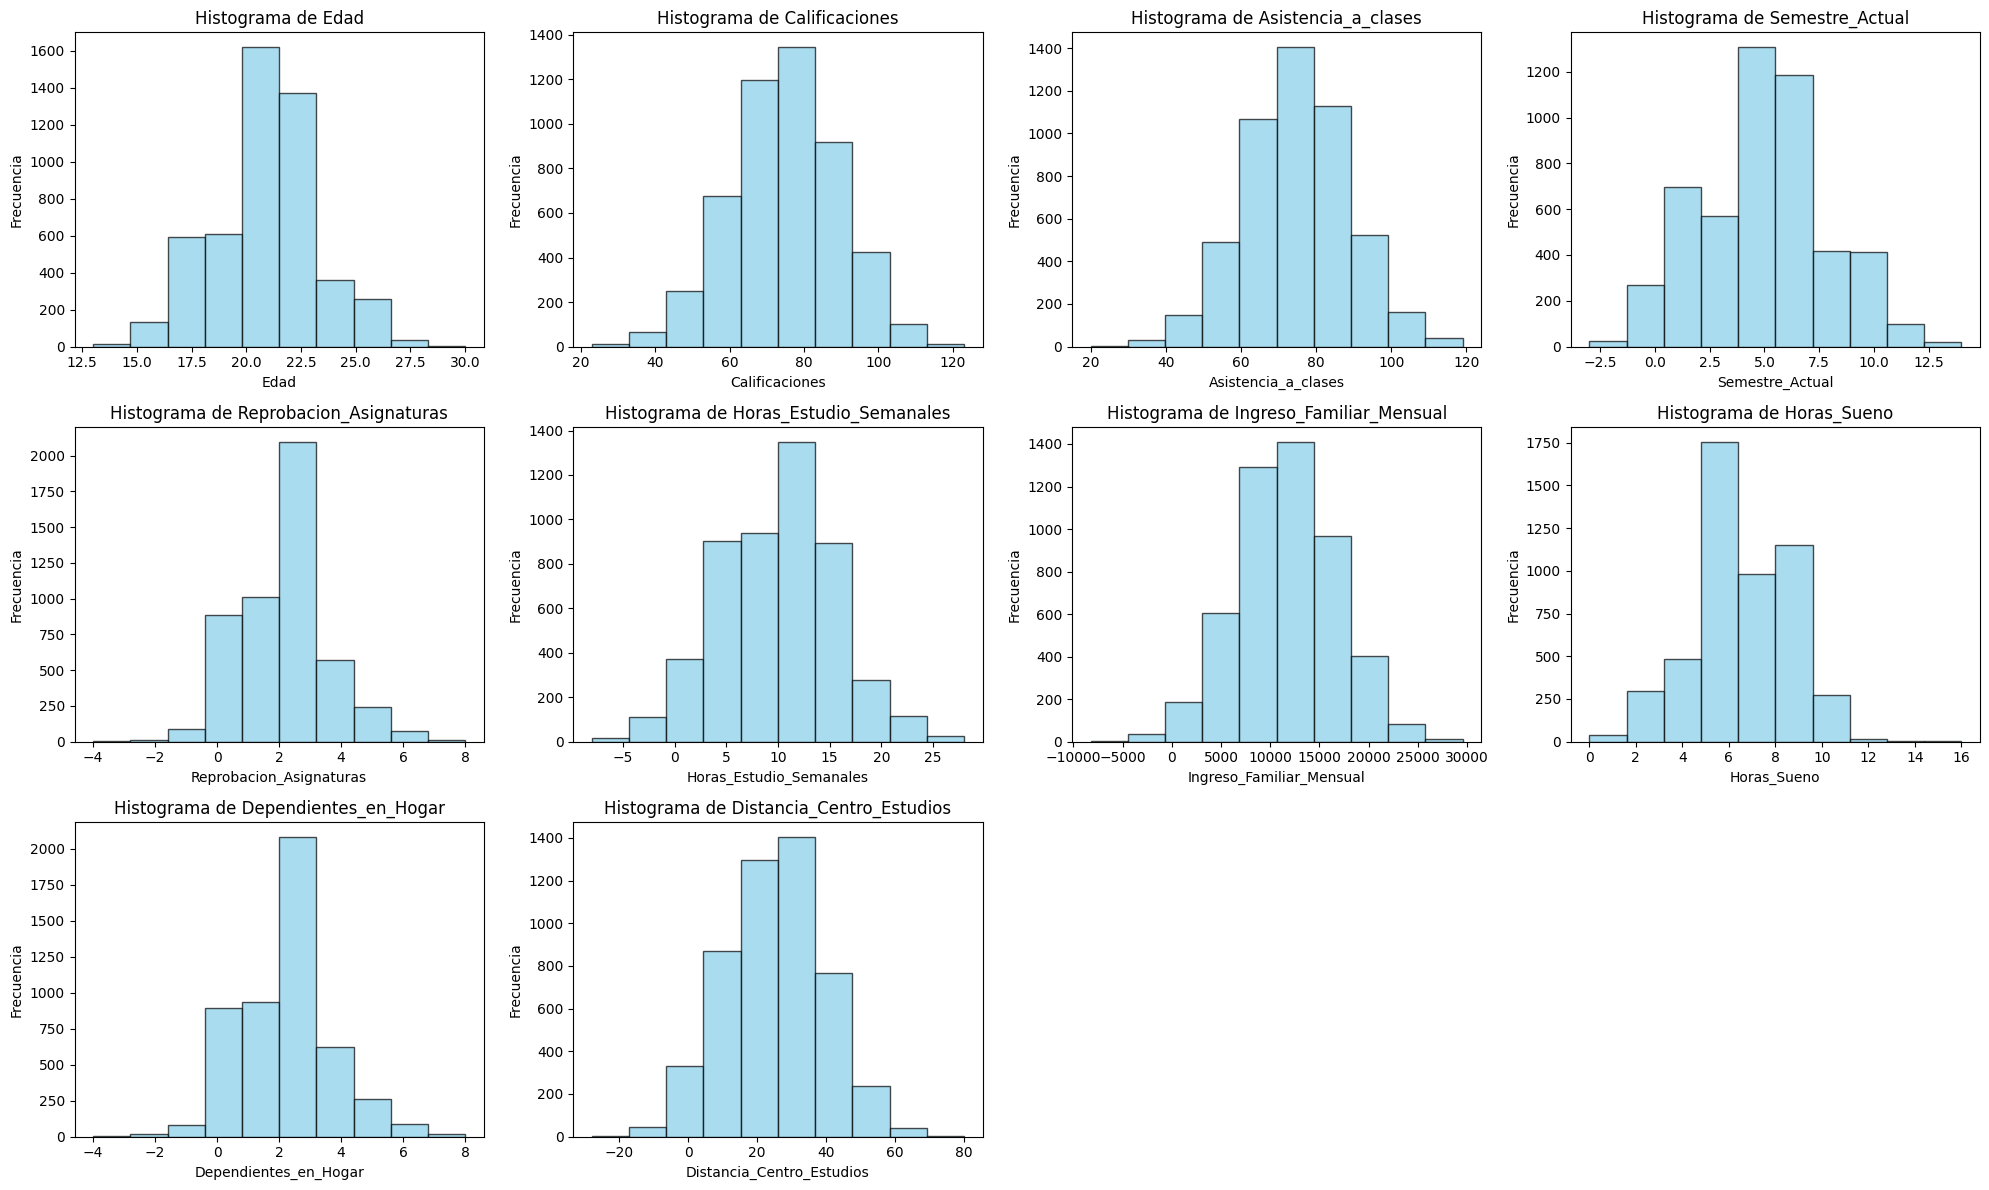

In [55]:
f_histograma_multiple_matriz(datos_transformados[variables_numericas])

### Diagramas de caja


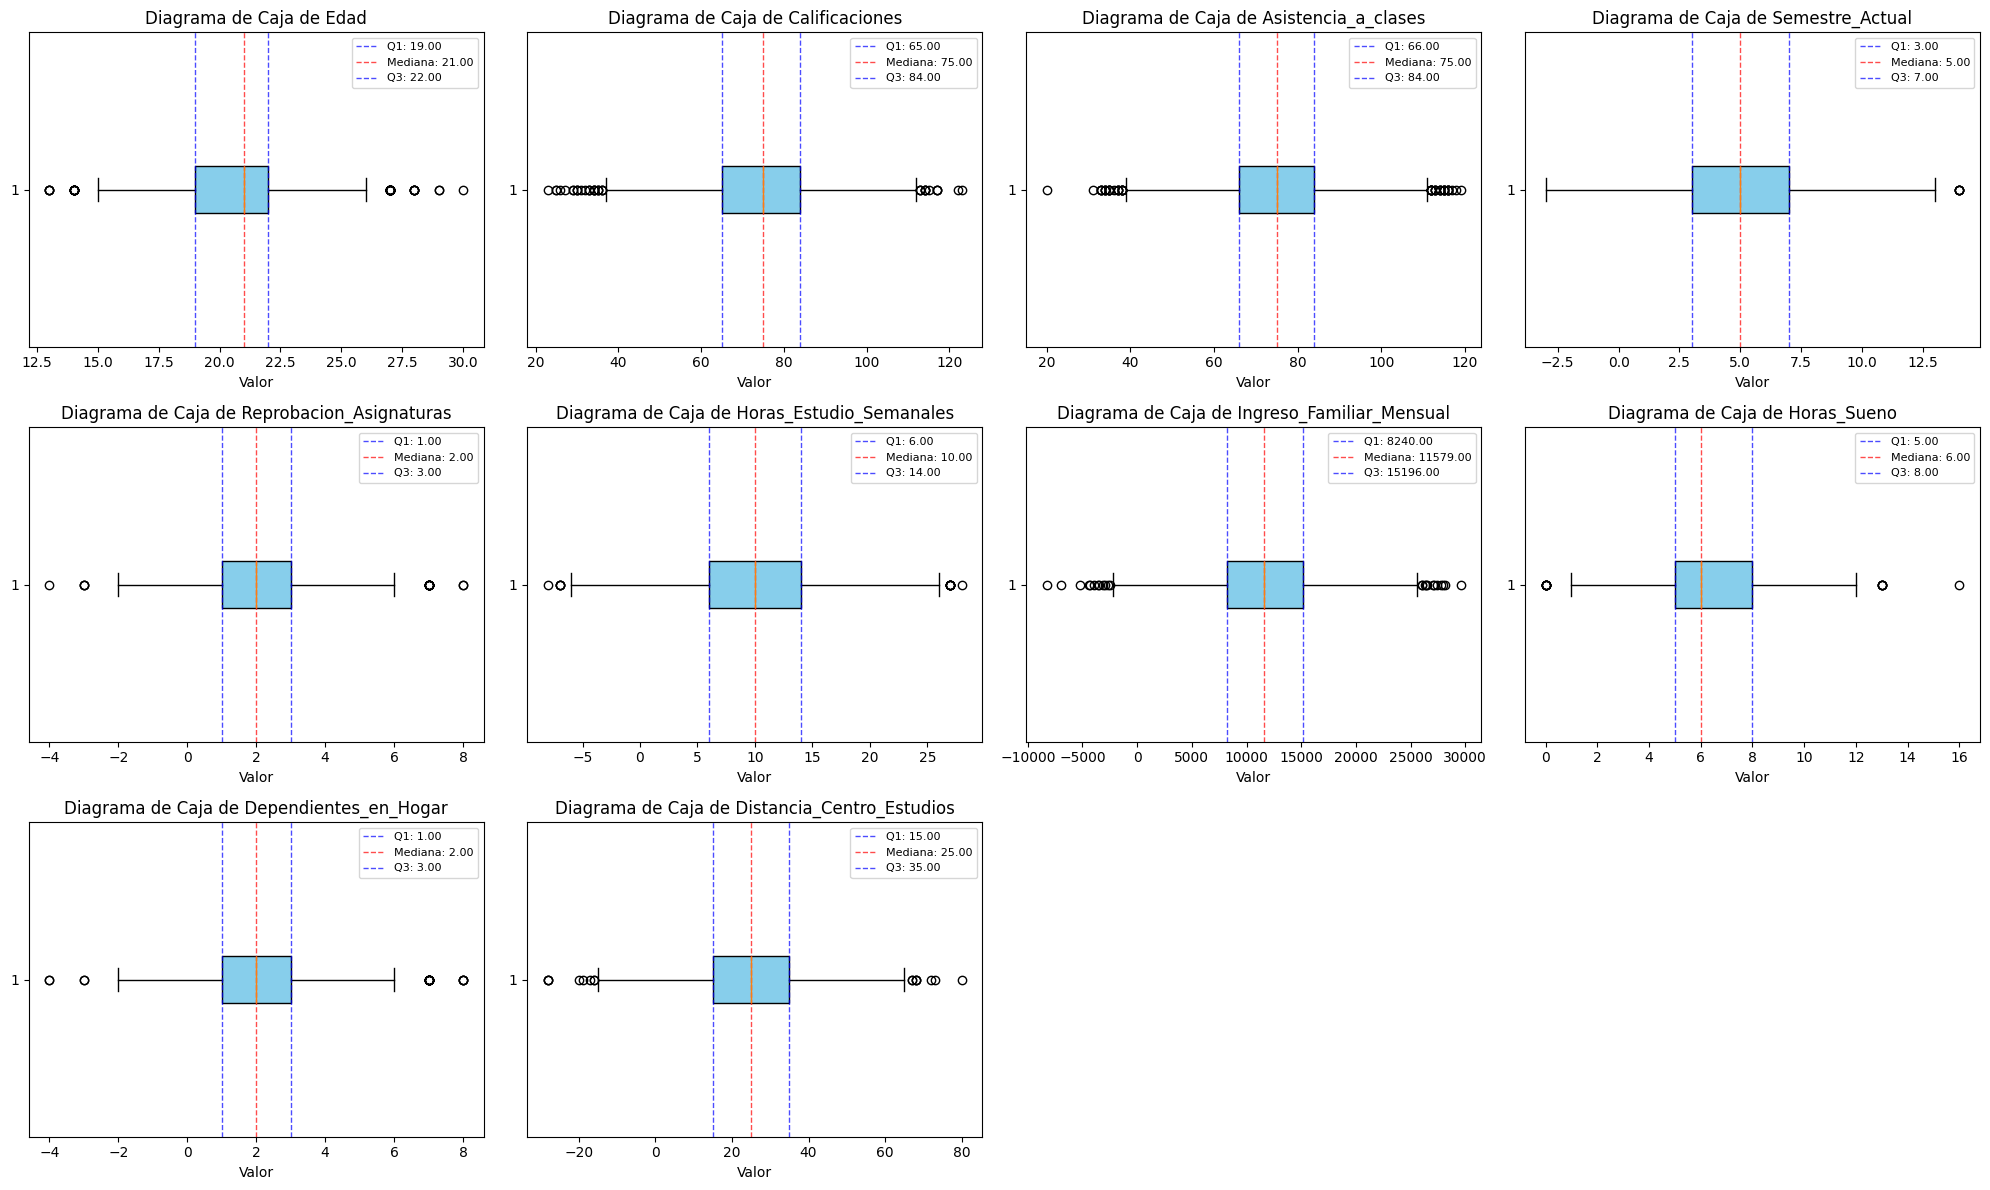

In [56]:
f_diagrama_caja_matriz(datos_transformados[variables_numericas])


### Limpiar datos atípicos

Se observan que algunas las variables numéricas tienen datos atípicos. Se va a modificar estos valores atípicos por el valor de la mediana.

La mediana, al ser el punto central de los datos, no se ve afectada por valores atípicos; la mediana sigue representando el centro de los datos sin verse influenciada por la asimetría; al usar la mediana, las transformaciones pueden ser más estables y reflejar mejor la distribución original. (Chat GPT, 2025)


##### Modificar atípicos de las variables numéricas
* Edad
* Calificaciones
* Asistencia_a_clases
* Semestre_Actual
* Reprobacion_Asignaturas
* Horas_Estudio_Semanales
* Ingreso_Familiar_Mensual
* Horas_Sueno
* Dependientes_en_Hogar
* Distancia_Centro_Estudios




#### Diagramas de caja transformados


In [57]:
# datos_transformados['Edad'] = f_modificar_atipicos(datos_transformados['Edad'])
# datos_transformados['Calificaciones'] = f_modificar_atipicos(datos_transformados['Calificaciones'])
# datos_transformados['Asistencia_a_clases'] = f_modificar_atipicos(datos_transformados['Asistencia_a_clases'])
# datos_transformados['Semestre_Actual'] = f_modificar_atipicos(datos_transformados['Semestre_Actual'])
# datos_transformados['Reprobacion_Asignaturas'] = f_modificar_atipicos(datos_transformados['Reprobacion_Asignaturas'])
# datos_transformados['Horas_Estudio_Semanales'] = f_modificar_atipicos(datos_transformados['Horas_Estudio_Semanales'])
# datos_transformados['Ingreso_Familiar_Mensual'] = f_modificar_atipicos(datos_transformados['Ingreso_Familiar_Mensual'])
# datos_transformados['Horas_Sueno'] = f_modificar_atipicos(datos_transformados['Horas_Sueno'])
# datos_transformados['Dependientes_en_Hogar'] = f_modificar_atipicos(datos_transformados['Dependientes_en_Hogar'])
# datos_transformados['Distancia_Centro_Estudios'] = f_modificar_atipicos(datos_transformados['Distancia_Centro_Estudios'])

# Por medio de bucle
for variable in variables_numericas:
    datos_transformados[variable] = f_modificar_atipicos(datos_transformados[variable])

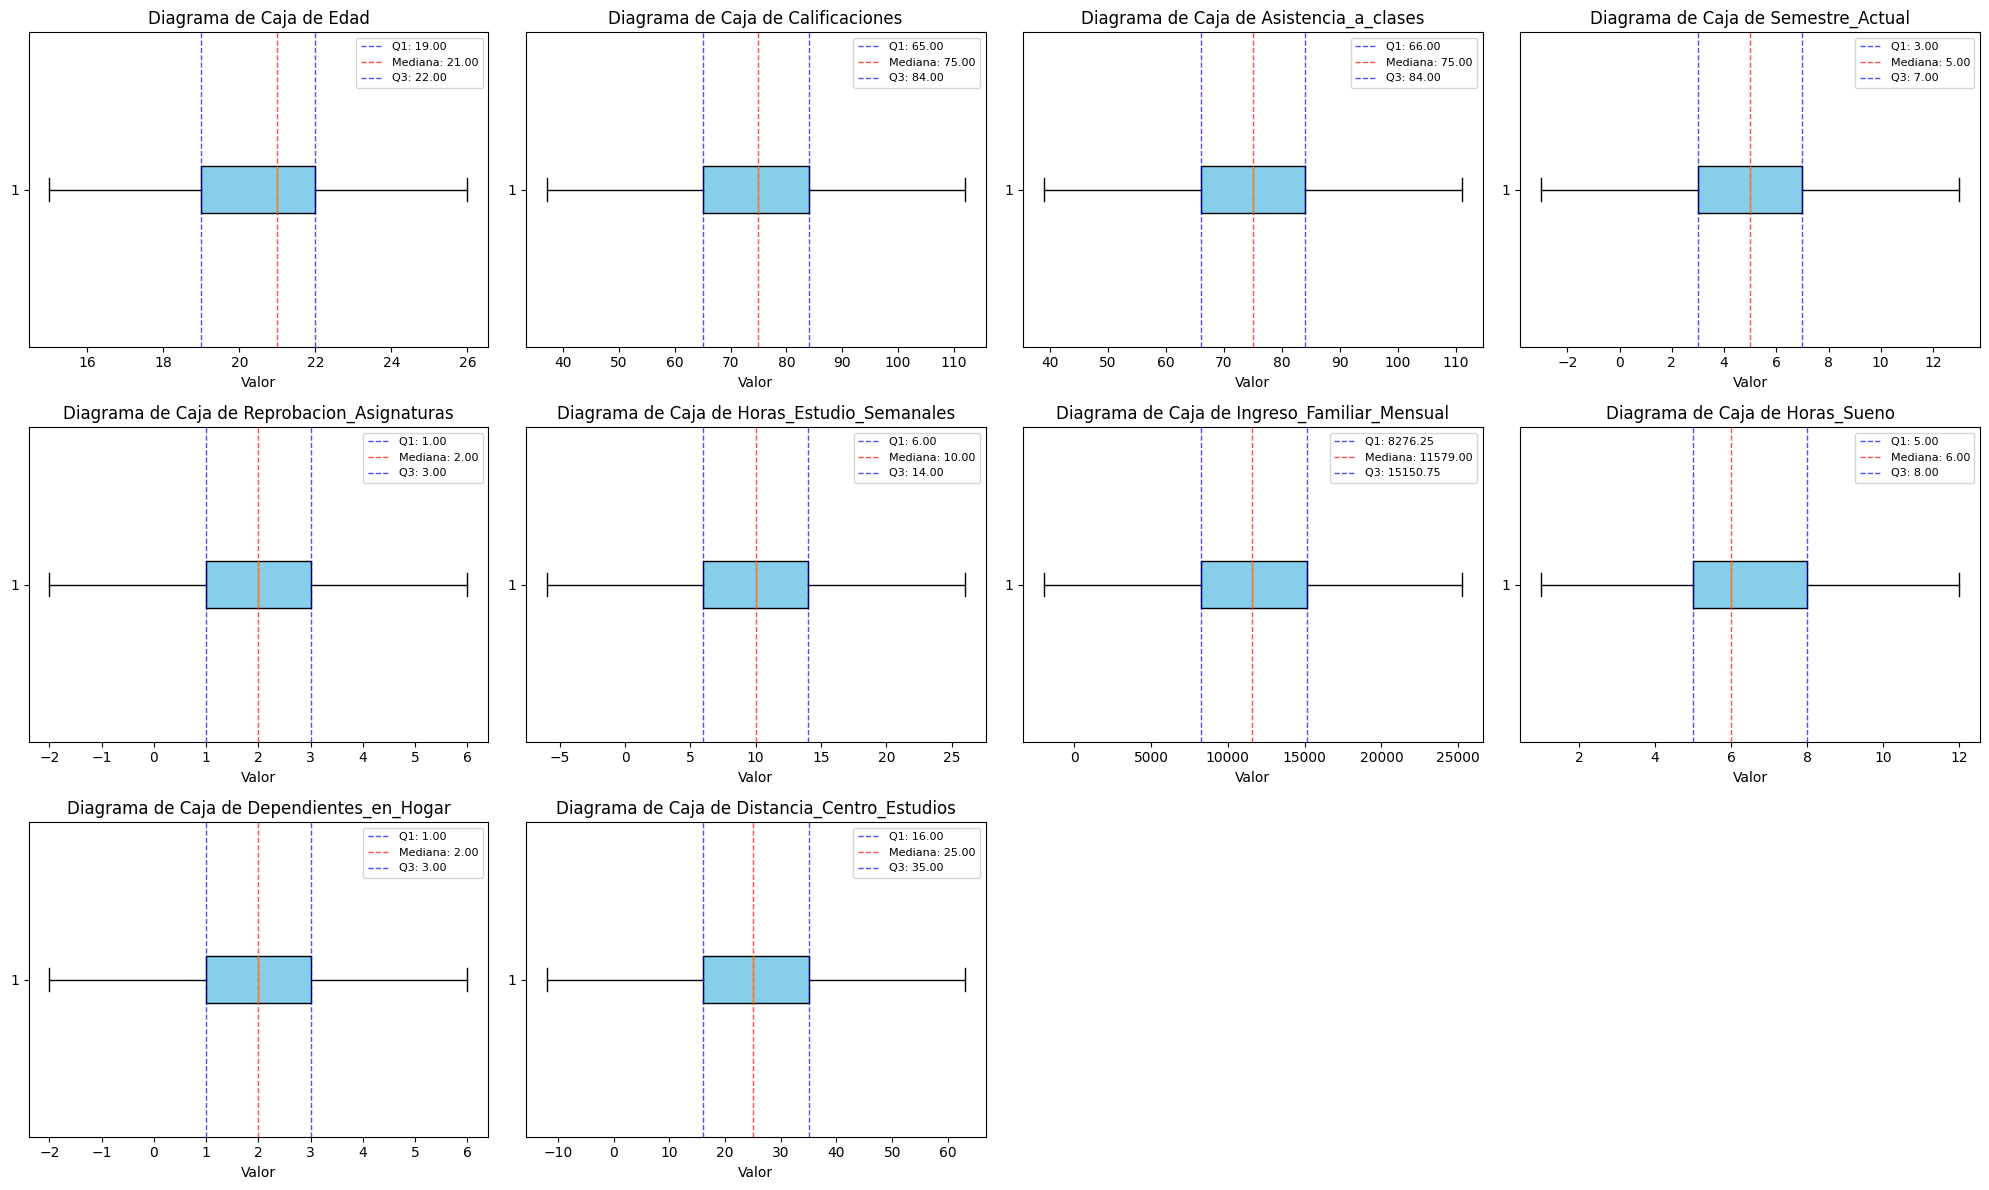

In [58]:
f_diagrama_caja_matriz(datos_transformados[variables_numericas])

### Variables categóricas


['Estado_Civil', 'Lugar_Residencia', 'Nivel_Socioeconomico', 'Apoyo_Financiero', 'Empleo_Parcial_o_Tiempo_Completo', 'Red_Apoyo_Social', 'Participacion_Extracurricular', 'Relaciones_Interpersonales', 'Problemas_Emocionales', 'Adaptacion_Entorno_Escolar', 'Personalidad', 'Autoeficacia_Academica', 'Condiciones_Salud', 'Problemas_Familiares', 'Tipo_Institucion', 'Acceso_Servicios_Basicos', 'Desercion']


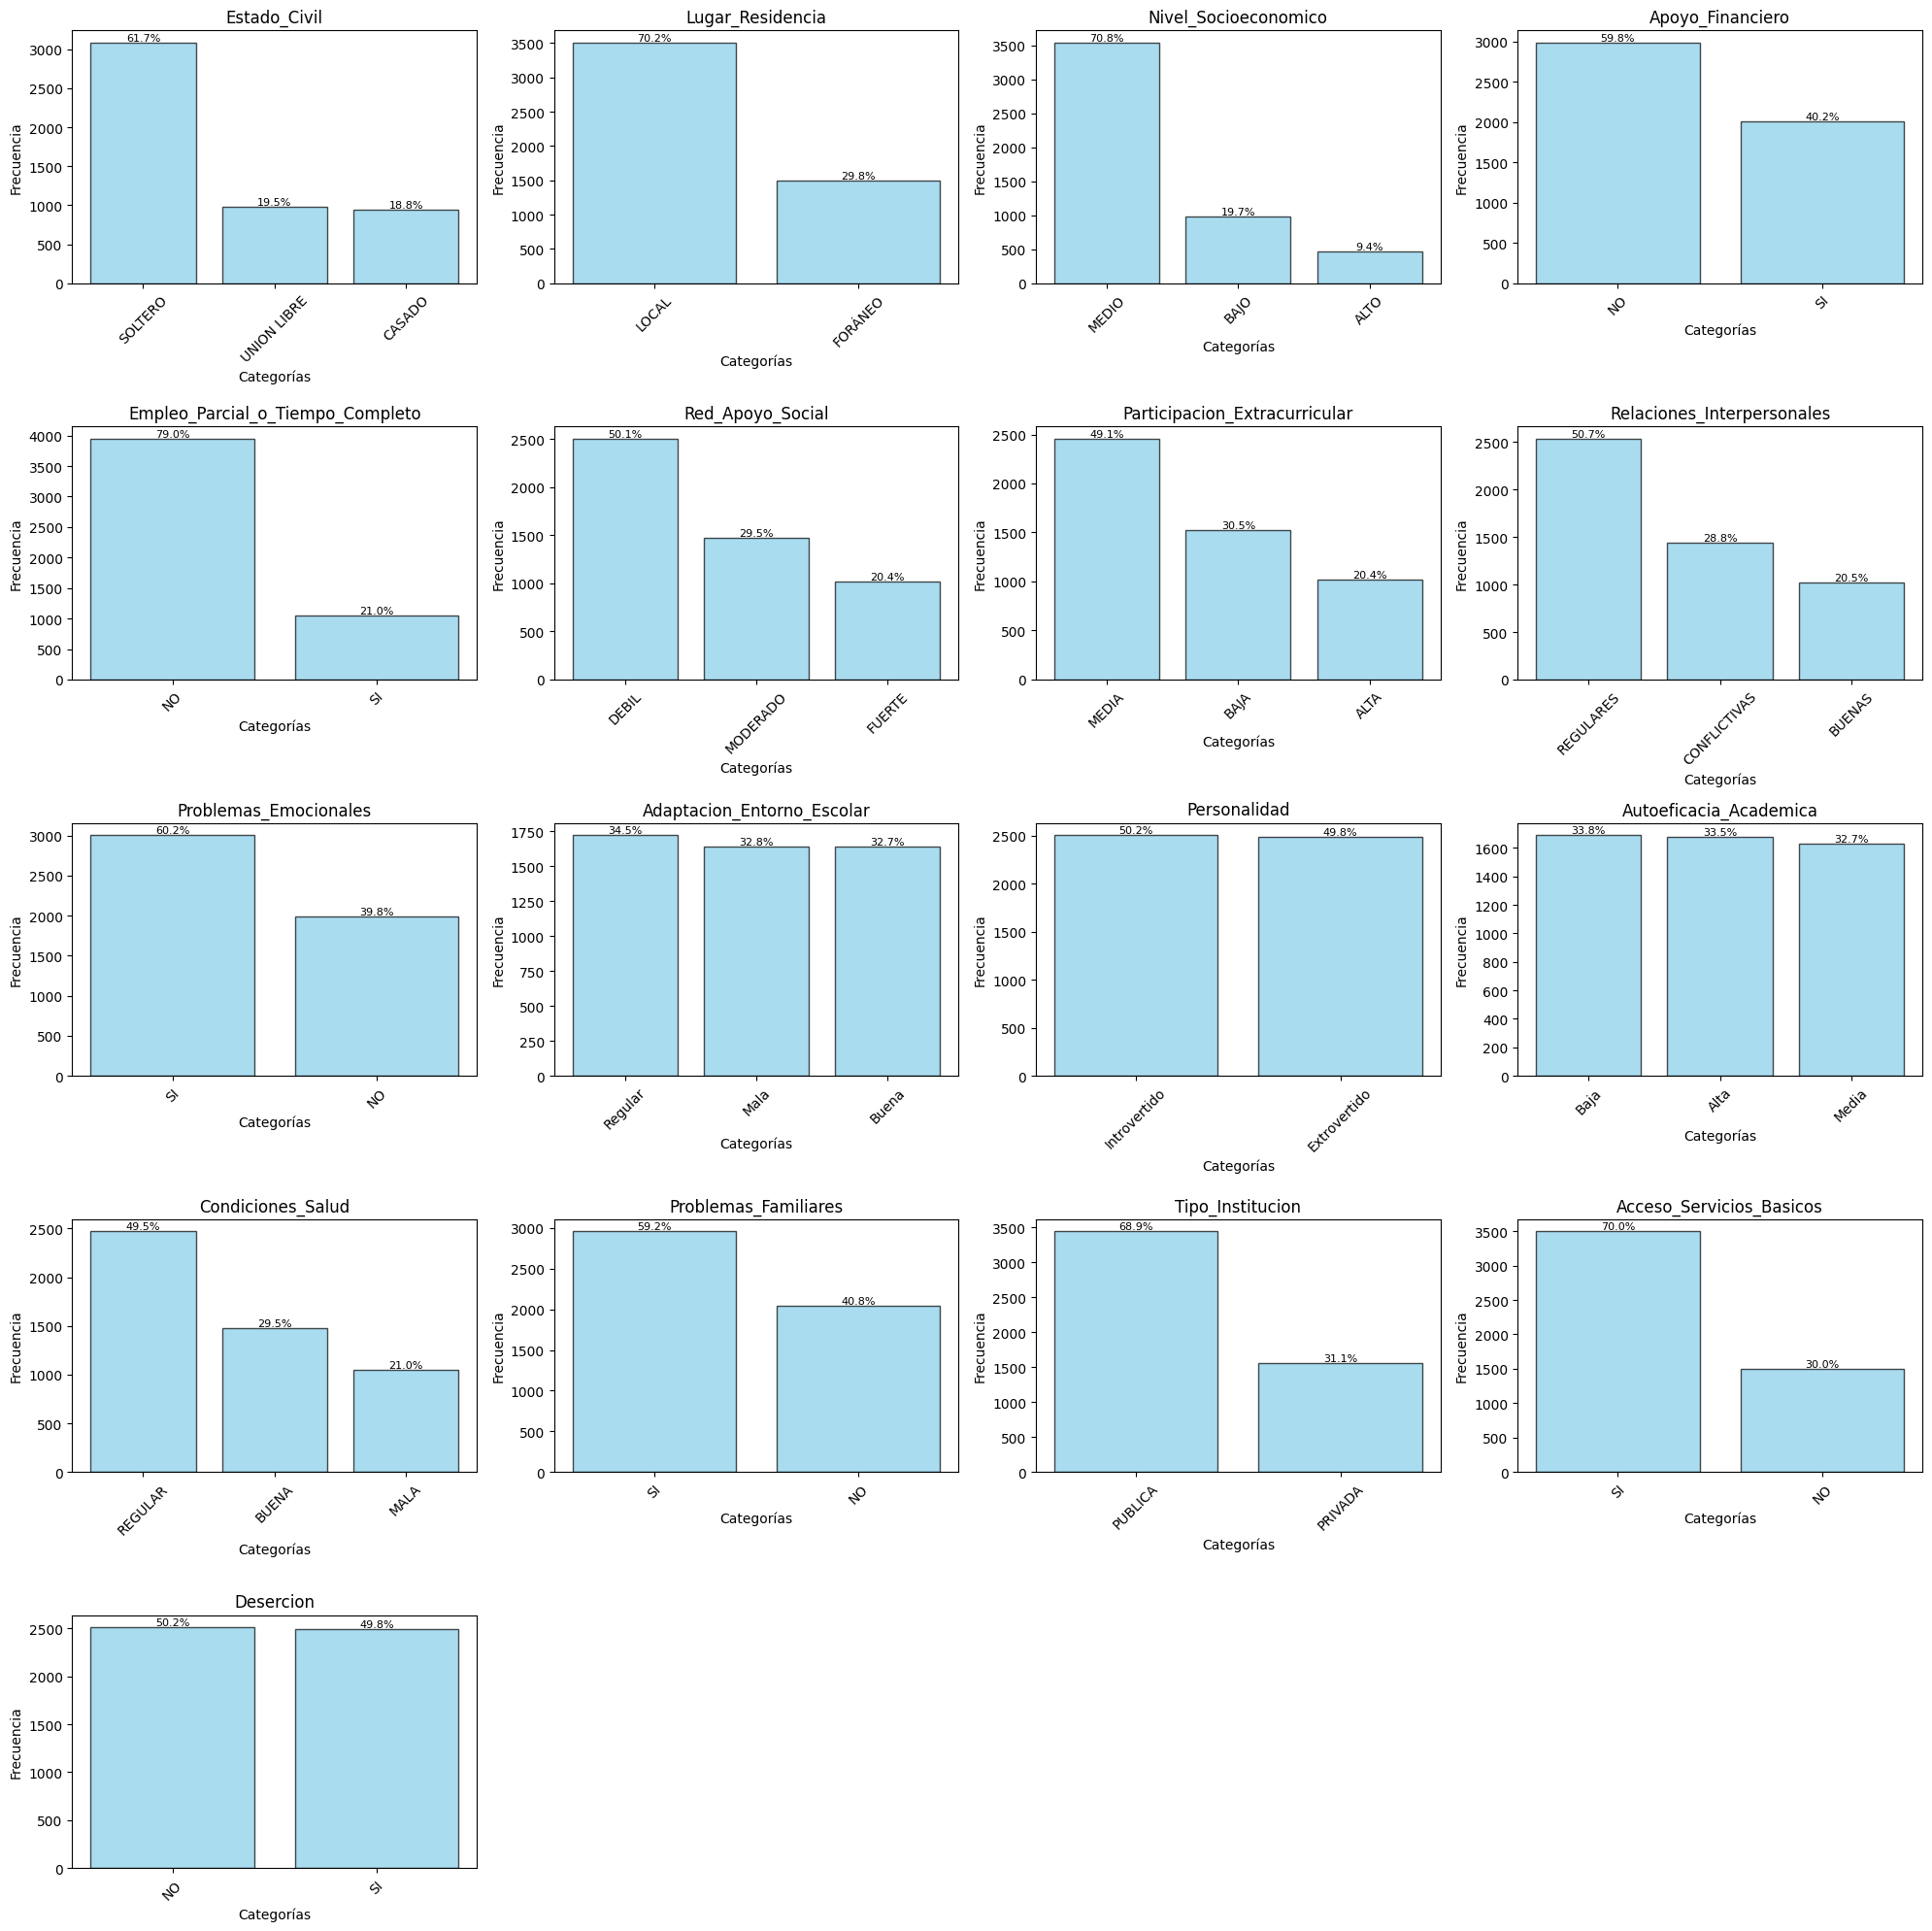

In [59]:
variables_categoricas = datos_transformados.select_dtypes(include=['object', 'category']).columns.tolist()
print(variables_categoricas)

f_barra_multiple_matriz (datos_transformados, variables=variables_categoricas, color='skyblue', mostrar='primeros')

#### Convertir a Inicial mayúscula y resto a minúscula a todos los valores categóricos

Por conveniencia y mejor comprensión se decide transformar los valores de los datos categóricos con la inicial en mayúscula y las demás letras en minúsculas.


In [60]:
# datos_transformados['Estado_Civil'] = f_convertir_MAYUSCULAS_minusculas (datos_transformados['Estado_Civil'])
# datos_transformados['Lugar_Residencia'] = f_convertir_MAYUSCULAS_minusculas (datos_transformados['Lugar_Residencia'])
# datos_transformados['Genero'] = f_convertir_MAYUSCULAS_minusculas (datos_transformados['Genero'])
# datos_transformados['Carrera_Actual'] = f_convertir_MAYUSCULAS_minusculas (datos_transformados['Carrera_Actual'])
# datos_transformados['Nivel_Educativo'] = f_convertir_MAYUSCULAS_minusculas (datos_transformados['Nivel_Educativo'])
# datos_transformados['Ocupacion_Laboral'] = f_convertir_MAYUSCULAS_minusculas (datos_transformados['Ocupacion_Laboral'])
# datos_transformados['Tipo_Residencia'] = f_convertir_MAYUSCULAS_minusculas (datos_transformados['Tipo_Residencia'])
# Aplicar la función a cada columna en el DataFrame

# Todos en un bucle
for columna in variables_categoricas:
    datos_transformados[columna] = f_convertir_MAYUSCULAS_minusculas(datos_transformados[columna])


#### Datos categóricos transformados


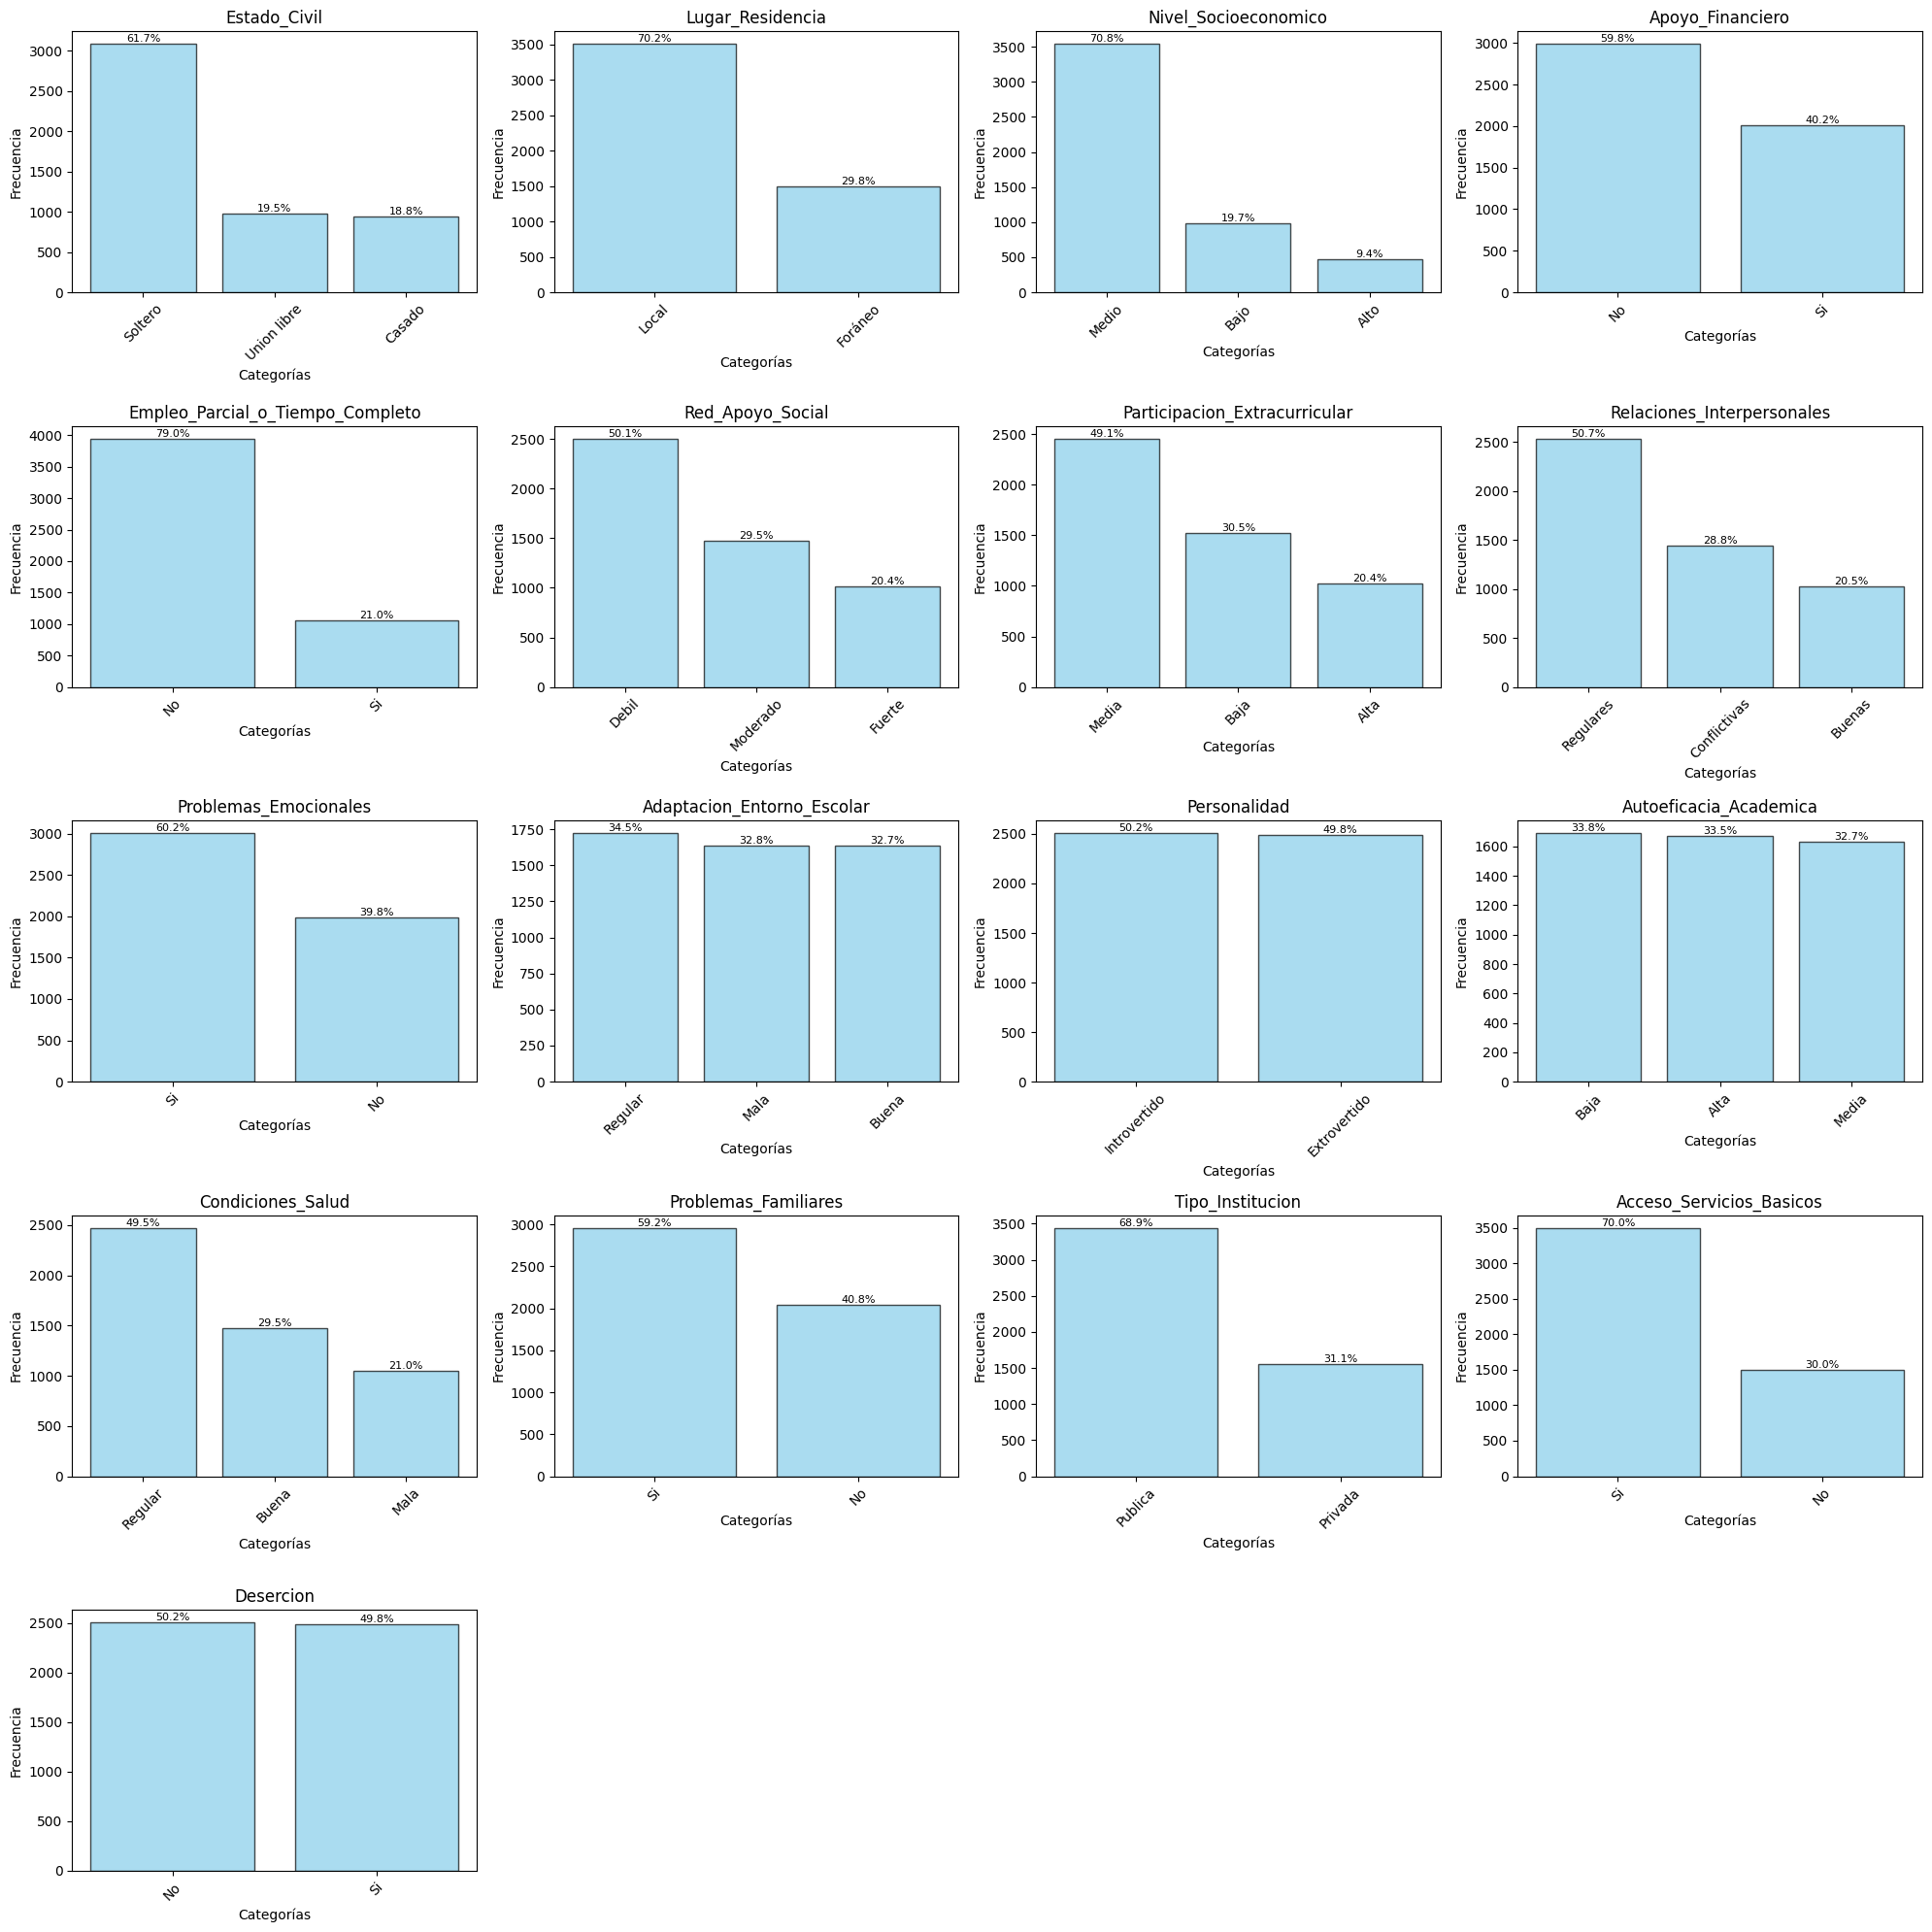

In [61]:
f_barra_multiple_matriz (datos_transformados, variables=variables_categoricas, color='skyblue', mostrar='primeros')

#### Convertir nombres de varfiables a minúsculas



In [62]:
# Convertir nombres de columnas a minúsculas
datos_transformados.columns = datos_transformados.columns.str.lower()

# Mostrar los nuevos nombres de las columnas
print(datos_transformados.columns)

Index(['edad', 'estado_civil', 'lugar_residencia', 'calificaciones',
       'asistencia_a_clases', 'semestre_actual', 'reprobacion_asignaturas',
       'horas_estudio_semanales', 'nivel_socioeconomico',
       'ingreso_familiar_mensual', 'apoyo_financiero',
       'empleo_parcial_o_tiempo_completo', 'red_apoyo_social',
       'participacion_extracurricular', 'relaciones_interpersonales',
       'problemas_emocionales', 'adaptacion_entorno_escolar', 'personalidad',
       'autoeficacia_academica', 'horas_sueno', 'condiciones_salud',
       'problemas_familiares', 'dependientes_en_hogar', 'tipo_institucion',
       'distancia_centro_estudios', 'acceso_servicios_basicos', 'desercion'],
      dtype='object')


#### Generar un archivo csv datos_transformados

In [63]:
# Guardar el DataFrame en un archivo CSV
datos_transformados.to_csv('datos_desercion_estudiantil_completo_transformados.csv', index=False)

# Interpretación

Se cargó y transformó el conjunto de datos del archivo cargado *datos_desercion_estudiantil_completo.csv*.

Se eliminaron columnas *ID_Estudiante* y *Fecha_Registro* del conjunto de datos original

Se quitaron valores atípicos de las variables numéricas y se transforamron en la mediana de los valores.

Se modificaron los valores en las variables categóricas por valores capitales.

Se modificaron los nombres de varfiables a minúsculas.

**No se escalaron ni estandarizaron datos numéricos**... pendiente

Se construyó un nuevo archivo para descargar llamado *datos_desercion_estudiantil_completo_transformados.csv*

El archivo preparado, transformado y limpio se encuentra en https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_desercion_estudiantil_completo_transformados.csv

